In [ ]:
import numpy as np #working with arrays
import pandas as pd #data manipulation and cleaning
import matplotlib.pyplot as plt #basic graphs
%matplotlib inline
import seaborn as sns #paterns and plot for visualization
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [43]:
df= pd.read_csv(r"C:\Users\Vinayak\Desktop\Non-Tech\Py Project1\Amazon Sale Report.csv",encoding='unicode_escape' )

In [ ]:
df.shape


In [ ]:
df.head() #default 5 records, custom number in function call

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
df.drop(['New','PendingS'], axis=1, inplace=True) #axis=1 means deleting entire column, inplace=true deletes the column in the main table permenantly

In [ ]:
df.info()

In [ ]:
pd.isnull(df)

In [ ]:
pd.isnull(df).sum() #sums all the null values in each column

In [ ]:
df.dropna(inplace=True) #drop null valued records in any of the column

In [ ]:
df.shape

In [ ]:
df['ship-postal-code']=df['ship-postal-code'].astype(int)

In [ ]:
df.info()

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Date'].dtype

In [ ]:
df.rename(columns={'Qty':'Quantity'})  #dictionary type of syntax. Use inplace to save permenantly

In [ ]:
df.describe() #gives means, min, count, etc for numerical columns

In [ ]:
df.describe(include='object') #for propperties of non numerical columns too

In [ ]:
df[['Qty', 'Amount']].describe() #only used for similiar date column

In [ ]:
df['Qty'].head()

In [ ]:
df.columns

In [ ]:
ax=sns.countplot(x='Size', data=df)


In [ ]:
ax=sns.countplot(x='Size', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
df.groupby('Size', as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=True)

In [ ]:
S_Qty=df.groupby('Size', as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False)

sns.barplot(x='Size', y='Qty', data=S_Qty)

In [ ]:
plt.figure(figsize=(15,9))
ax=sns.countplot(data=df, x='Courier Status', hue='Status') #hue parameter when creating pairplots in seaborn to color plot aspects based on the values of a specific variable
plt.show()

In [ ]:
ax=df['Size'].hist()
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:

ful_check=df['fulfilled-by'].value_counts()

plt.pie(ful_check, labels=ful_check.index)

In [ ]:

df['Category']=df['Category'].astype(str)
column_data = df['Category']

plt.hist(column_data, bins=10, edgecolor='Black')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#checking B2B
B2B_check= df['B2B'].value_counts()
plt.pie(B2B_check, labels=B2B_check.index, autopct='%1.1f%%')
plt.show()

In [ ]:
#size and category distribution
x_data=df['Category']
y_data=df['Size']

plt.scatter(x_data, y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Scattered Plot')
plt.show()

In [ ]:
#plot count of cities by state
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('StateWise Distribution')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#top 10 states

top10_state=df['ship-state'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
dfin=df[df['ship-state'].isin(top10_state.index)]
# print(dfin)
sns.countplot(data=dfin, x='ship-state', hue='ship-state')  # Creating the countplot #x='column name'
plt.xlabel('states')
plt.ylabel('count')
plt.title('Big 10 of Amazon states')
plt.xticks(rotation=90)
plt.show()

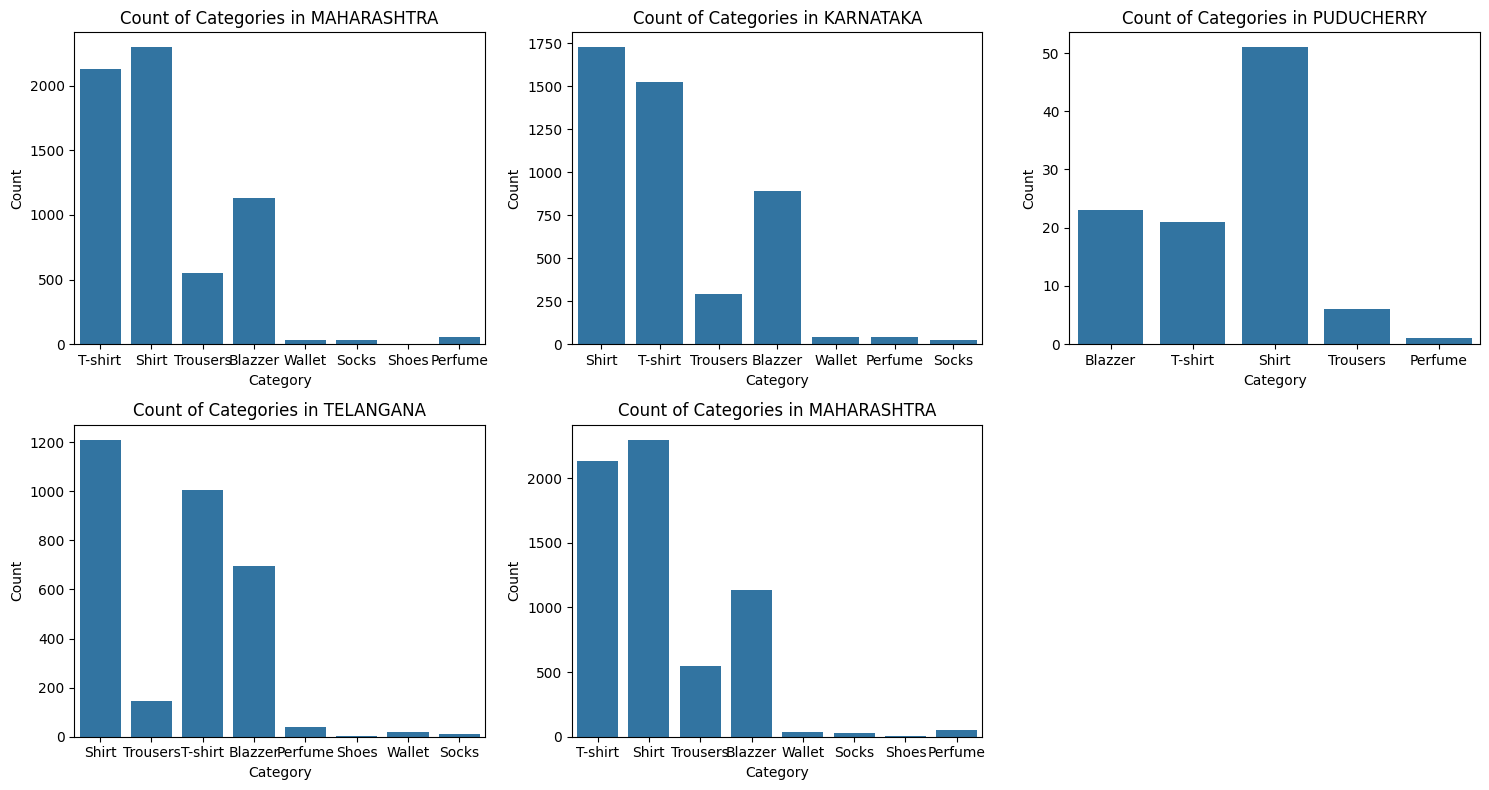

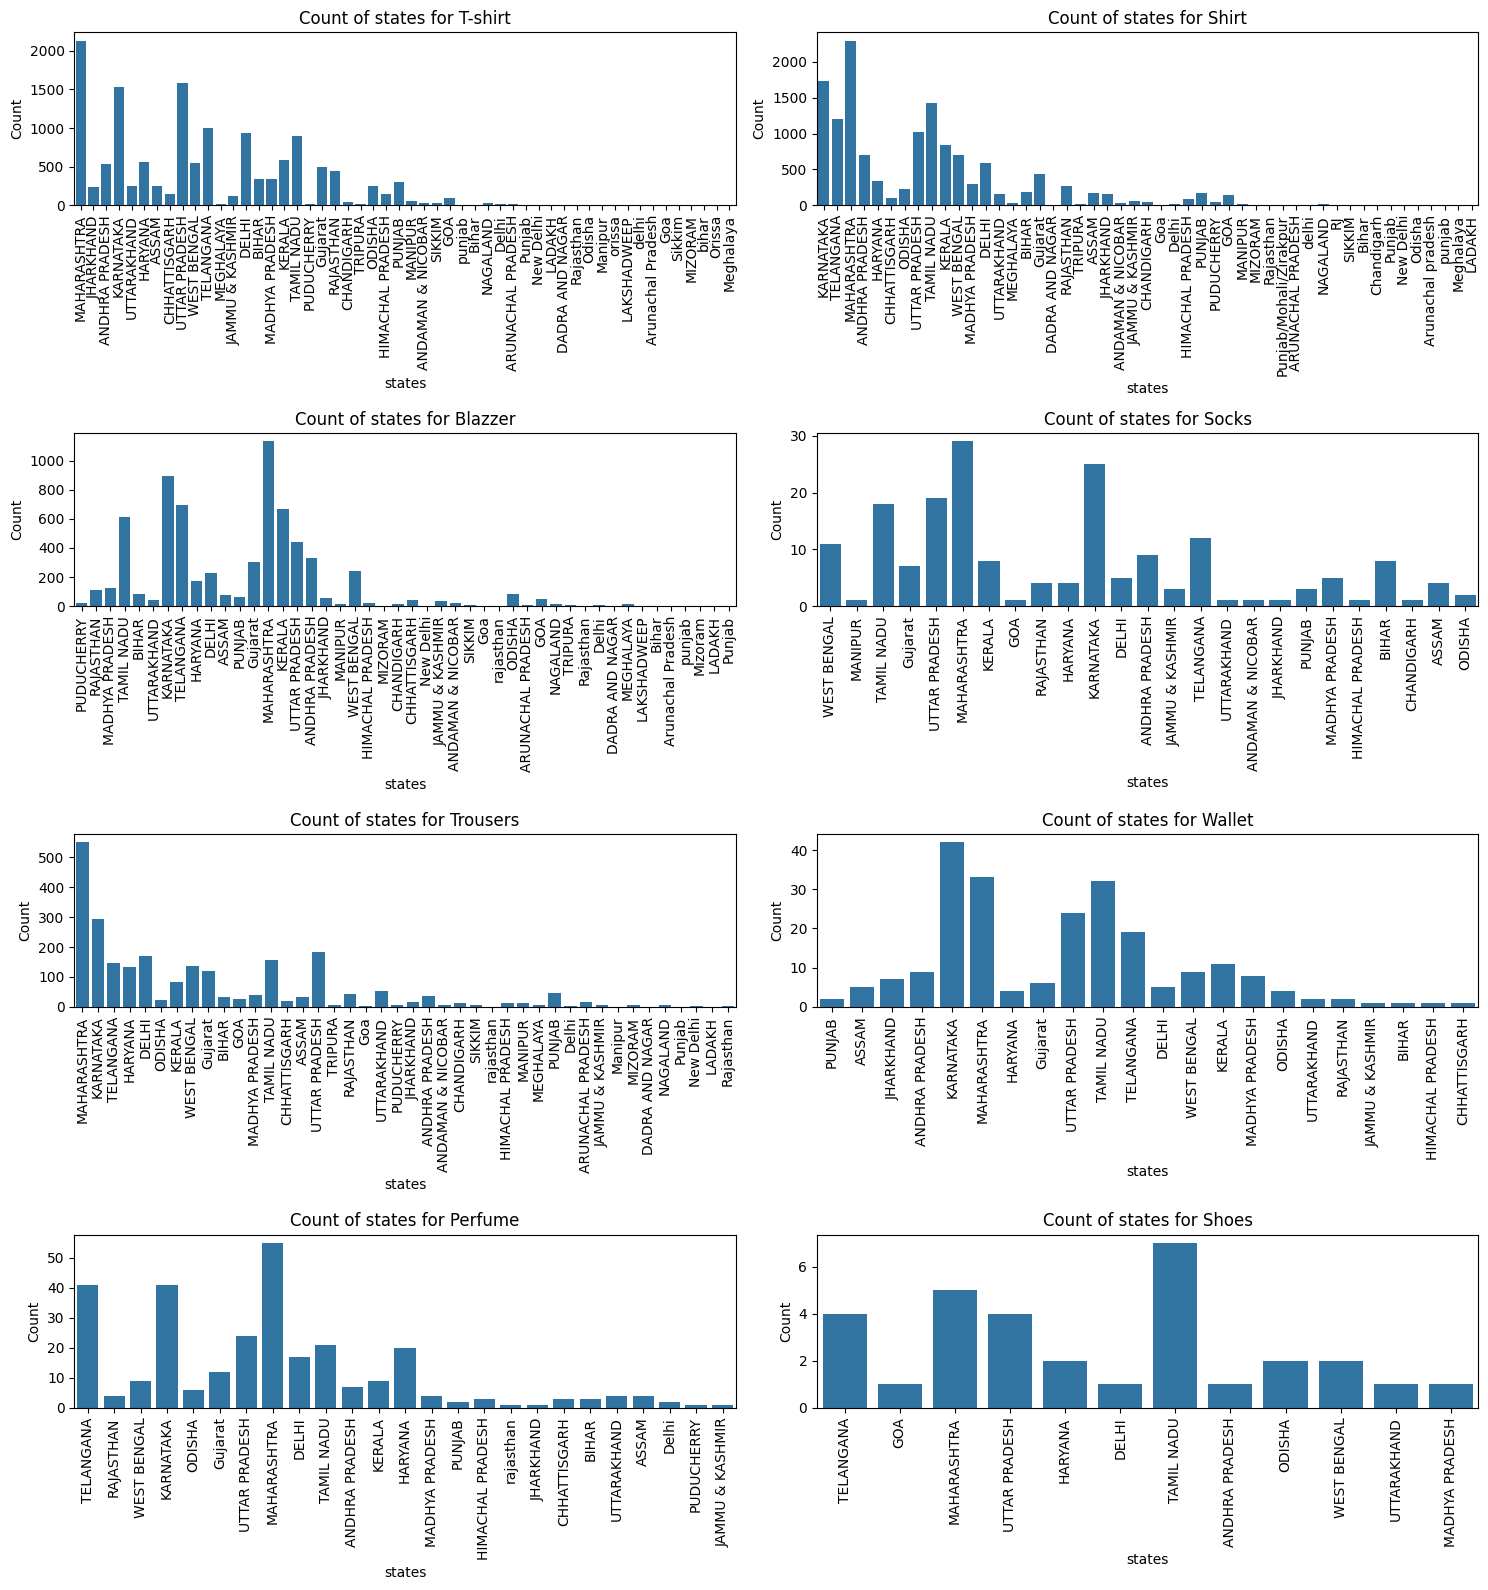

In [42]:
data1=df.groupby('ship-state', as_index=False)['Category'].count().sort_values(by='Category', ascending=True)
data1.describe()

# print(data1)
# Determine the number of unique states
unique_states = df['ship-state'].head()
num_states = len(unique_states)

# Determine the grid size
num_cols = 3  # Number of columns
num_rows = (num_states + num_cols - 1) // num_cols  # Calculate rows needed based on columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each state in a separate subplot
for i, state in enumerate(unique_states):
    sns.countplot(data=df[df['ship-state'] == state], x='Category', ax=axes[i])
    axes[i].set_title(f'Count of Categories in {state}')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


unique_cat=df['Category'].unique()
num_cat=len(unique_cat)

num_col=2
num_row=(num_cat+num_col-1)//num_col

fig, axes=plt.subplots(num_row, num_col, figsize=(15, num_row*4))

axes=axes.flatten()

for i, cat in enumerate (unique_cat):
    sns.countplot(data=df[df['Category']==cat], x='ship-state', ax=axes[i])
    axes[i].set_title(f'Count of states for {cat}')
    axes[i].set_xlabel('states')
    plt.setp(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# for cat in unique_cat:
#     plt.figure(figsize=(10,5))
#     ax=sns.countplot(data=df[df['Category']==cat], x='ship-state')
#     for bars in ax.containers:
#         ax.bar_label(bars)
#     plt.xlabel('states')  # Label for x-axis
#     plt.ylabel('Count')  # Label for y-axis
#     plt.xticks(rotation=90)
#     plt.title(f'Count of states for {cat}')  # Title of the plot
#     plt.show()  # Displaying the plot
    

Conclusion
Maharashtra has the highest customer base for Amazon and mainly serves retailer and fulfilled by EasyShips, Experiences high demand in shirts from Maharashtra itself.